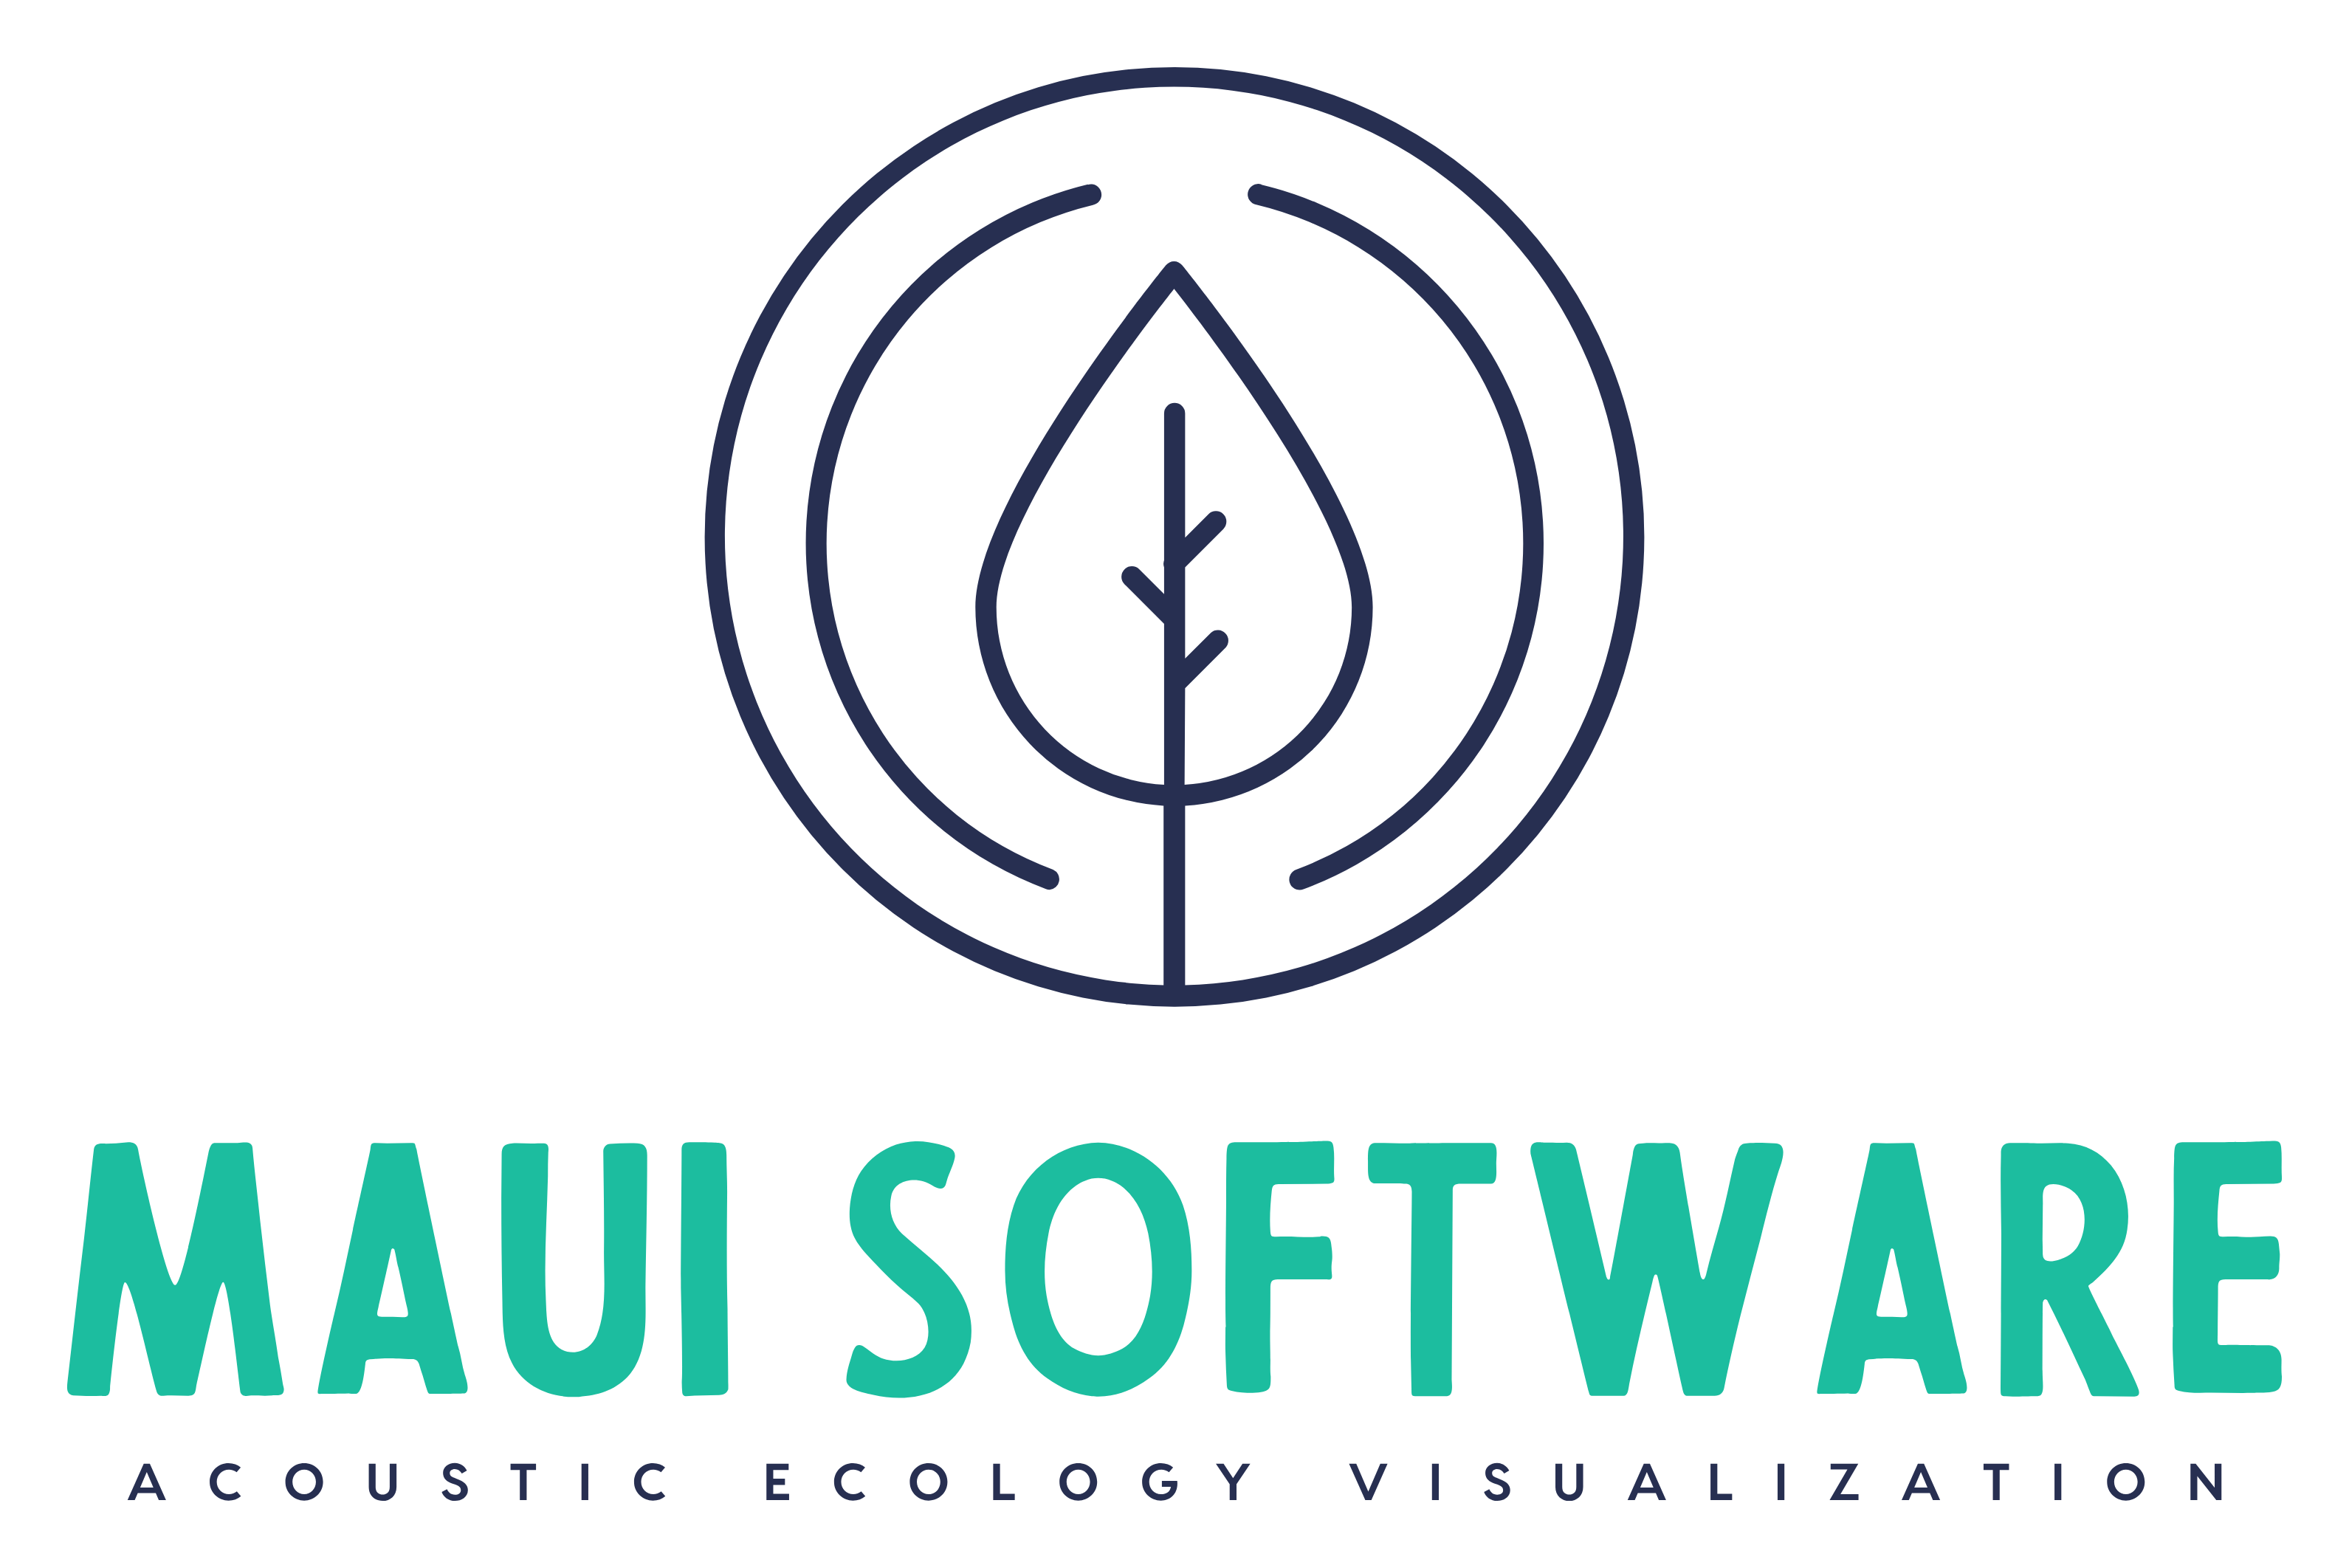

# Welcome to Maui!
## Examples series - Spectrograms

In this example, you'll see how to create spectrograms and false color spectrograms with Maui.

If you have any questions or encounter any issues, please let us know through the [project's GitHub discussions](https://github.com/maui-software/maui-software/discussions)!



# 1. Import Maui

## 1.1. Installation

Maui is available on PyPi and can be installed using pip with the following command. One important detail is that Maui is specifically designed for use in coding interfaces like Colab and Jupyter Lab due to its advanced visualization capabilities, leveraging the power of Plotly.



In [146]:
!pip install maui-software

In [147]:
!pip install scikit-maad scikit-image scikit-learn

## 1.2. Import

Once installed, it's time to import!

Maui consists of several submodules that need to be imported individually. For this tutorial, we are particularly interested in utilizing the IO and EDA modules.

In [148]:
import os
import datetime
import pandas as pd

from maad import sound, util, features

from maui import samples, visualizations, acoustic_indices, files_metadata, io, eda, utils

# 2. Load and prepare dataset

The initial task is to load the data. In this example we will use the Gympie and Woondum National Park dataset, recorded by Queensland University of Technology:

Phillips, Yvonne (2018): Environmental long-duration audio recordings: Gympie and Woondum National Park . Queensland University of Technology. (Sound) https://doi.org/10.4225/09/5a7297ee4b893

We use a subset of 6 months of data. The file name structure is structured as follows:

YYYYMMDDTHHMMSS+1000__site_id.wav

## 2.1. Define file metadata format

In [149]:
format_file_path = 'gympie_format.yaml'
audio_path = './gympie_sample_dataset_month'

def date_time_func(values):
    values["timestamp_init"] = datetime.datetime.strptime( 
                values["date"] + " " + values["time"], "%Y%m%d %H%M%S"
            )
    return values

## 2.2. Load audio dataset

In [150]:
df = io.get_audio_info(audio_path, 'GYMPIE_FILE_FORMAT', date_time_func=date_time_func, format_file_path=format_file_path, store_duration=True, perc_sample=1)

In [151]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
df['time'] = df['timestamp_init'].dt.strftime('%H:%M')
df

,date,time,zone,site,id,timestamp_init,duration,file_path
0,2015-07-18,06:45,+1000,Gympie-NP,277001,2015-07-18 06:45:52,24347.004807,./gympie_sample_dataset_month/20150718T064552+...
1,2015-07-10,20:17,+1000,Gympie-NP,276956,2015-07-10 20:17:31,13350.005261,./gympie_sample_dataset_month/20150710T201731+...
2,2015-07-04,13:31,+1000,Gympie-NP,269827,2015-07-04 13:31:41,24347.004807,./gympie_sample_dataset_month/20150704T133141+...
3,2015-07-19,00:00,+1000,Gympie-NP,277033,2015-07-19 00:00:03,24347.004807,./gympie_sample_dataset_month/20150719T000003+...
4,2015-07-16,20:17,+1000,Gympie-NP,276992,2015-07-16 20:17:38,13342.005986,./gympie_sample_dataset_month/20150716T201738+...
...,...,...,...,...,...,...,...,...
116,2015-06-24,13:31,+1000,Gympie-NP,331597,2015-06-24 13:31:48,24347.004807,./gympie_sample_dataset_month/20150624T133148+...
117,2015-06-27,00:00,+1000,Gympie-NP,331566,2015-06-27 00:00:03,24347.004807,./gympie_sample_dataset_month/20150627T000003+...
118,2015-07-02,06:45,+1000,Gympie-NP,269832,2015-07-02 06:45:56,24347.004807,./gympie_sample_dataset_month/20150702T064556+...
119,2015-07-06,00:00,+1000,Gympie-NP,277045,2015-07-06 00:00:02,24347.004807,./gympie_sample_dataset_month/20150706T000002+...


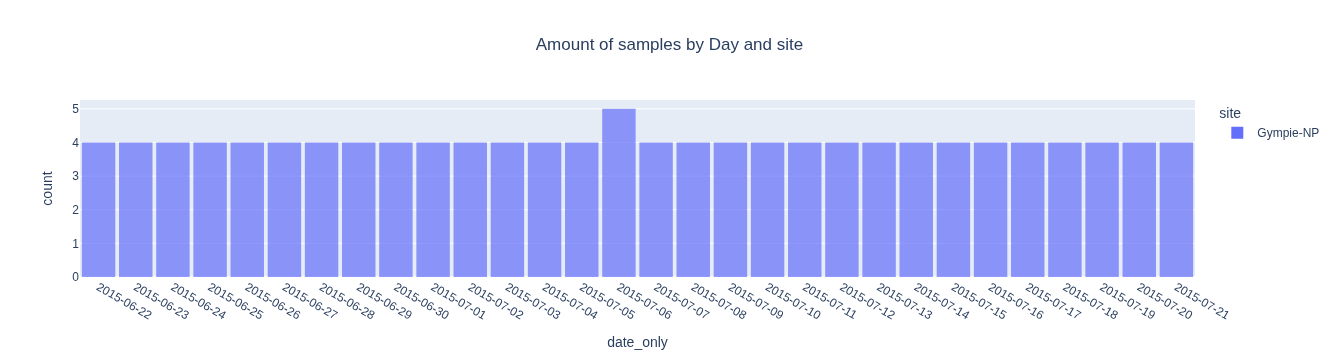

In [152]:
df_filter = df

## 2.3. Segment audio files

In [153]:
segmented_df = utils.segment_audio_files(df_filter, 600, './outputs_temporal_viz', 'file_path', 'timestamp_init')

In [154]:
segmented_df['duration'] = (segmented_df['end_time'] - segmented_df['start_time']).dt.total_seconds()
segmented_df

,date,time,zone,site,id,timestamp_init,duration,file_path,date_only,segment_file_path,start_time,end_time
75,2015-06-22,06:45,+1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 06:45:51,2015-06-22 06:55:51.000000
75,2015-06-22,06:45,+1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 06:55:51,2015-06-22 07:05:51.000000
75,2015-06-22,06:45,+1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 07:05:51,2015-06-22 07:15:51.000000
75,2015-06-22,06:45,+1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 07:15:51,2015-06-22 07:25:51.000000
75,2015-06-22,06:45,+1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 07:25:51,2015-06-22 07:35:51.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
111,2015-07-21,13:31,+1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 19:31:42,2015-07-21 19:41:42.000000
111,2015-07-21,13:31,+1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 19:41:42,2015-07-21 19:51:42.000000
111,2015-07-21,13:31,+1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 19:51:42,2015-07-21 20:01:42.000000
111,2015-07-21,13:31,+1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 20:01:42,2015-07-21 20:11:42.000000


In [155]:
segmented_df['start_hour'] = pd.to_datetime(segmented_df['start_time'], unit='s').dt.strftime('%H:%M:%S')

In [156]:
def pre_calculation_method(s, fs):

    Sxx_power, tn, fn, ext = sound.spectrogram (s, fs)
    Sxx_noNoise= sound.median_equalizer(Sxx_power, display=False, extent=ext)
    Sxx_dB_noNoise = util.power2dB(Sxx_noNoise)

    Sxx, tn, fn, ext = sound.spectrogram(s, fs, mode='amplitude')

    pre_calc_vars = {'s':s, 'Sxx': Sxx, 'tn':tn , 'fn':fn , 'ext':ext, 'Sxx_dB_noNoise':Sxx_dB_noNoise }
    return pre_calc_vars

In [157]:
def get_aci(pre_calc_vars):
    aci_xx, aci_per_bin, aci_sum  = features.acoustic_complexity_index(pre_calc_vars['Sxx'])
    indices = {'aci_xx': aci_xx, 'aci_per_bin':aci_per_bin , 'aci_sum':aci_sum}
    return indices
acoustic_indices_methods = [get_aci]

In [158]:
import pandas as pd
from scipy.io import wavfile
import os

def is_valid_wav(file_path):
    """Check if the WAV file is valid."""
    if not os.path.exists(file_path):
        return "Path does not exists"

    try:
        fs, data = wavfile.read(file_path)
        # Check if data is not empty and has the expected shape
        if data.size == 0:
            return "Empty file"
        return "OK"
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return "Error"

def add_validity_column(df, file_path_col):
    """Add a column to the DataFrame indicating if the audio files are valid."""
    df['file_path_valid'] = df[file_path_col].apply(is_valid_wav)
    return df

# Example usage
# Assuming segmented_df is your DataFrame and 'file_path' is the column with file paths
segmented_valid_df = add_validity_column(segmented_df, 'segment_file_path')


In [159]:
segmented_valid_df_filter = segmented_valid_df[segmented_valid_df['file_path_valid'] == "OK"]
segmented_valid_df_filter

,date,time,zone,site,id,timestamp_init,duration,file_path,date_only,segment_file_path,start_time,end_time,start_hour,file_path_valid
75,2015-06-22,06:45,+1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 06:45:51,2015-06-22 06:55:51.000000,06:45:51,OK
75,2015-06-22,06:45,+1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 06:55:51,2015-06-22 07:05:51.000000,06:55:51,OK
75,2015-06-22,06:45,+1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 07:05:51,2015-06-22 07:15:51.000000,07:05:51,OK
75,2015-06-22,06:45,+1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 07:15:51,2015-06-22 07:25:51.000000,07:15:51,OK
75,2015-06-22,06:45,+1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 07:25:51,2015-06-22 07:35:51.000000,07:25:51,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2015-07-21,13:31,+1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 19:31:42,2015-07-21 19:41:42.000000,19:31:42,OK
111,2015-07-21,13:31,+1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 19:41:42,2015-07-21 19:51:42.000000,19:41:42,OK
111,2015-07-21,13:31,+1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 19:51:42,2015-07-21 20:01:42.000000,19:51:42,OK
111,2015-07-21,13:31,+1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 20:01:42,2015-07-21 20:11:42.000000,20:01:42,OK


In [160]:
temp_dir = os.path.abspath('./temp_ac_files/')
# df_valid = segmented_df[segmented_df['file_path'].notnull()]

df_indices = acoustic_indices.calculate_acoustic_indices(
                    df_init = segmented_valid_df_filter,
                    file_path_col = 'segment_file_path',
                    acoustic_indices_methods = acoustic_indices_methods,
                    pre_calculation_method = pre_calculation_method,
                    parallel=False,
                    chunk_size = 5,
                    temp_dir = temp_dir
        )


Calculating acoustic indices...
Preparing final dataframe and removing temporary files...
Fixing data types...


In [161]:
df_indices

,date,time,zone,site,id,timestamp_init,duration,file_path,date_only,segment_file_path,start_time,end_time,start_hour,file_path_valid,aci_xx,aci_per_bin,aci_sum
0,2015-06-22,06:45,1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 06:45:51,2015-06-22 06:55:51.000000,06:45:51,OK,6.54957704e-05 4.37766267e-06 1.38381700e-05 ....,"[0.69719401, 0.52849193, 0.54916094, 0.5744079...",307.317862
1,2015-06-22,06:45,1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 06:55:51,2015-06-22 07:05:51.000000,06:55:51,OK,2.39097372e-05 5.96946399e-05 1.28760405e-05 ....,"[0.70290963, 0.51824445, 0.56726903, 0.5129805...",301.011227
2,2015-06-22,06:45,1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 07:05:51,2015-06-22 07:15:51.000000,07:05:51,OK,1.75502921e-05 1.87979952e-05 2.19354064e-05 ....,"[0.70397472, 0.53842106, 0.49522423, 0.4362486...",304.782077
3,2015-06-22,06:45,1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 07:15:51,2015-06-22 07:25:51.000000,07:15:51,OK,2.89391352e-05 1.39976494e-05 8.63356204e-06 ....,"[0.70476102, 0.52245259, 0.57209689, 0.5579087...",308.699697
4,2015-06-22,06:45,1000,Gympie-NP,331568,2015-06-22 06:45:51,600.000000,./gympie_sample_dataset_month/20150622T064551+...,2015-06-22,./outputs_temporal_viz/20150622T064551+1000_Gy...,2015-06-22 07:25:51,2015-06-22 07:35:51.000000,07:25:51,OK,1.58307808e-04 6.56267328e-06 1.12211870e-04 ....,"[0.70620849, 0.52374599, 0.56835541, 0.5770132...",309.835742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,2015-07-21,13:31,1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 19:31:42,2015-07-21 19:41:42.000000,19:31:42,OK,2.58568532e-05 2.85727160e-05 7.32390038e-06 ....,"[0.70989181, 0.52272372, 0.58094828, 0.5823008...",296.296368
4374,2015-07-21,13:31,1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 19:41:42,2015-07-21 19:51:42.000000,19:41:42,OK,5.39215836e-05 1.09471185e-05 2.59692521e-05 ....,"[0.73482258, 0.53339406, 0.57617271, 0.5831119...",296.257829
4375,2015-07-21,13:31,1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 19:51:42,2015-07-21 20:01:42.000000,19:51:42,OK,3.76862847e-05 2.35516385e-05 3.42952648e-05 ....,"[0.7312602, 0.52451625, 0.57874954, 0.578376, ...",296.347853
4376,2015-07-21,13:31,1000,Gympie-NP,277113,2015-07-21 13:31:42,600.000000,./gympie_sample_dataset_month/20150721T133142+...,2015-07-21,./outputs_temporal_viz/20150721T133142+1000_Gy...,2015-07-21 20:01:42,2015-07-21 20:11:42.000000,20:01:42,OK,3.04190243e-05 1.41336810e-07 7.86075333e-06 ....,"[0.74880809, 0.54315509, 0.59400843, 0.5914548...",296.430507


# 3. Visualize data

## 3.1. Diel plot

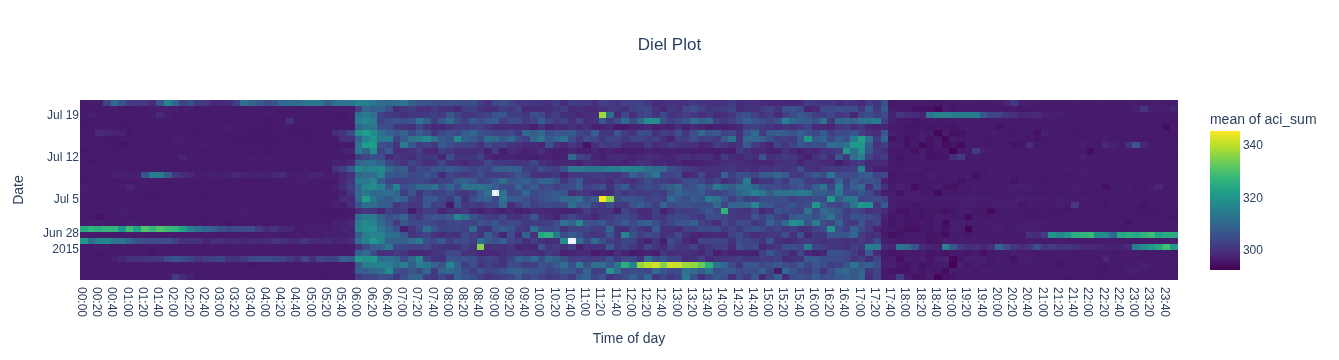

In [162]:
fig = visualizations.diel_plot(
    df_indices,
    date_col='date',
    time_col='start_hour',
    duration_col='duration',
    time_bin_size=10,
    color_map_col='aci_sum',
    agg_type='mean',
    show_plot= True)